## The most demanded job skills for different data jobs in EU? What are they?

### Methodology

 1. Cleaning up skills column by exploding it
 2. Filtering the most demanded skills for the final plot
 3. Allocate the skills to the groups of skill types
 4. Plot final finding using a scatterplot

In [16]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
list_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden"
]

jobs_top4 = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

df_EU_top4 = df[df['job_country'].isin(list_countries) & df['job_title_short'].isin(jobs_top4)].copy()

In [36]:
df_EU_top4 = df_EU_top4.dropna(subset='salary_year_avg')
df_EU_top4_ex = df_EU_top4.explode('job_skills')
df_EU_top4_ex

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
212,Data Scientist,NATOIS-0008 Data Scientist (NS) - TUE 13 Jun,"Brussels, Belgium",via Ai-Jobs.net,Full-time,False,Belgium,2023-06-05 13:56:28,False,False,Belgium,year,157500.0,NaN,"EMW, Inc.",c,"{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
212,Data Scientist,NATOIS-0008 Data Scientist (NS) - TUE 13 Jun,"Brussels, Belgium",via Ai-Jobs.net,Full-time,False,Belgium,2023-06-05 13:56:28,False,False,Belgium,year,157500.0,NaN,"EMW, Inc.",r,"{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
212,Data Scientist,NATOIS-0008 Data Scientist (NS) - TUE 13 Jun,"Brussels, Belgium",via Ai-Jobs.net,Full-time,False,Belgium,2023-06-05 13:56:28,False,False,Belgium,year,157500.0,NaN,"EMW, Inc.",sql,"{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
212,Data Scientist,NATOIS-0008 Data Scientist (NS) - TUE 13 Jun,"Brussels, Belgium",via Ai-Jobs.net,Full-time,False,Belgium,2023-06-05 13:56:28,False,False,Belgium,year,157500.0,NaN,"EMW, Inc.",python,"{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
212,Data Scientist,NATOIS-0008 Data Scientist (NS) - TUE 13 Jun,"Brussels, Belgium",via Ai-Jobs.net,Full-time,False,Belgium,2023-06-05 13:56:28,False,False,Belgium,year,157500.0,NaN,"EMW, Inc.",aws,"{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,python,"{'libraries': ['hadoop', 'spark', 'airflow'], ..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,hadoop,"{'libraries': ['hadoop', 'spark', 'airflow'], ..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,spark,"{'libraries': ['hadoop', 'spark', 'airflow'], ..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,airflow,"{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [37]:
df_EU_top4_ex = df_EU_top4_ex.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

length = len(df_EU_top4)

df_EU_top4_ex

,count,median
job_skills,,
python,679,101029.00
sql,573,102500.00
spark,290,111175.00
aws,264,103584.00
azure,222,98400.75
...,...,...
smartsheet,1,155000.00
symphony,1,89100.00
solidity,1,140000.00


In [41]:
df_EU_top4_ex['skill_percent'] = df_EU_top4_ex['count'] / length * 100
skill_demand = 8
skills_in_demand = df_EU_top4_ex[df_EU_top4_ex['skill_percent'] > skill_demand]
skills_in_demand

,count,median,skill_percent
job_skills,,,
python,679,101029.00,55.976917
sql,573,102500.00,47.238252
spark,290,111175.00,23.907667
aws,264,103584.00,21.764221
azure,222,98400.75,18.301731
tableau,182,100500.00,15.004122
java,138,98283.00,11.376752
r,133,98500.00,10.964551
excel,126,80850.00,10.387469


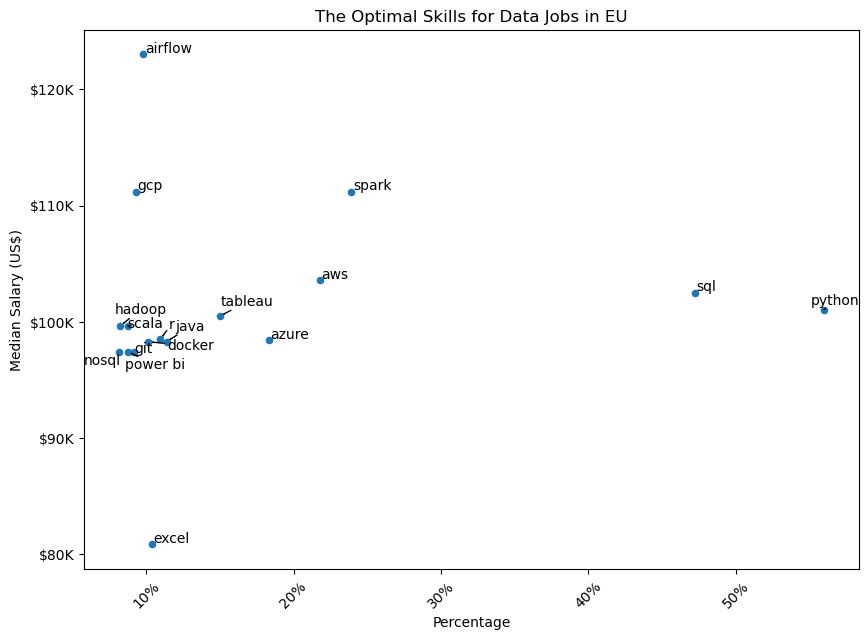

In [48]:
from adjustText import adjust_text

skills_in_demand.plot(kind='scatter', x='skill_percent', y='median', figsize=(10,7))
plt.title('The Optimal Skills for Data Jobs in EU')
plt.xlabel('Percentage')
plt.ylabel('Median Salary (US$)')
plt.xticks(rotation=45, ha='center')

texts = []
for i, txt in enumerate(skills_in_demand.index):
    texts.append(plt.text(skills_in_demand['skill_percent'].iloc[i], skills_in_demand['median'].iloc[i], txt))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1))

plt.show()

In [49]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['powerbi',
  'cognos',
  'excel',
  'tableau',
  'qlik',
  'visio',
  'word',
  'power bi',
  'ssis',
  'microstrategy',
  'ms access',
  'sap',
  'sas',
  'powerpoint',
  'spss',
  'nuix',
  'ssrs',
  'datarobot',
  'spreadsheet',
  'looker',
  'splunk',
  'msaccess',
  'alteryx',
  'sharepoint',
  'sheets',
  'dax',
  'outlook',
  'esquisse'],
 'programming': ['mongodb',
  'apl',
  'assembly',
  'no-sql',
  'c',
  'java',
  'cobol',
  'matlab',
  'c#',
  'swift',
  'vb.net',
  'sass',
  'delphi',
  'dart',
  'css',
  'lisp',
  'c++',
  'shell',
  't-sql',
  'rust',
  'pascal',
  'scala',
  'sas',
  'lua',
  'clojure',
  'erlang',
  'groovy',
  'crystal',
  'ruby',
  'nosql',
  'fortran',
  'mongo',
  'f#',
  'visual basic',
  'bash',
  'objective-c',
  'typescript',
  'kotlin',
  'python',
  'javascript',
  'powershell',
  'vba',
  'julia',
  'solidity',
  'perl',
  'visualbasic',
  'go',
  'sql',
  'ocaml',
  'golang',
  'elixir',
  'php',
  'haskell',
  'html',
 

In [50]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerbi
0,analyst_tools,cognos
0,analyst_tools,excel
0,analyst_tools,tableau
0,analyst_tools,qlik
...,...,...
9,sync,rocketchat
9,sync,mattermost
9,sync,webex
9,sync,ringcentral


In [54]:
df_EU_skills_tech = skills_in_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_EU_skills_tech = df_EU_skills_tech.set_index('skills')
df_EU_skills_tech

,count,median,skill_percent,technology
skills,,,,
python,679,101029.00,55.976917,programming
sql,573,102500.00,47.238252,programming
spark,290,111175.00,23.907667,libraries
aws,264,103584.00,21.764221,cloud
azure,222,98400.75,18.301731,cloud
tableau,182,100500.00,15.004122,analyst_tools
java,138,98283.00,11.376752,programming
r,133,98500.00,10.964551,programming
excel,126,80850.00,10.387469,analyst_tools


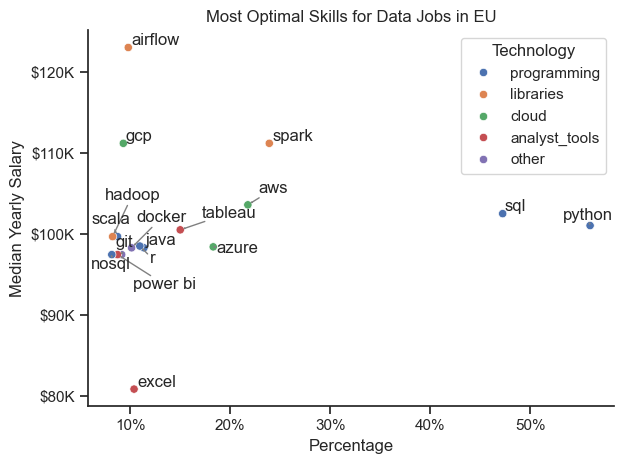

In [56]:
sns.scatterplot(
    data=df_EU_skills_tech,
    x='skill_percent',
    y='median',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_EU_skills_tech.index):
    texts.append(plt.text(df_EU_skills_tech['skill_percent'].iloc[i], df_EU_skills_tech['median'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percentage')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Jobs in EU')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()